# Redimensionnement d'image par *Seam Carving*

> L'objectif est de redimensionner une image par la méthode de [*Seam Carving*](https://faculty.runi.ac.il/arik/scweb/imret/imret.pdf). Cette technique consiste à supprimer des chemins d'énergie minimale sur l'image, c'est-à-dire utilisant des pixels de couleurs relativement uniformes. Ainsi, on évite de trop modifier l'image.

<figure>
<center>
<img src=https://raw.githubusercontent.com/cpge-itc/itc2/main/files/3_prog_dyn/seam_carving/tower.png height=200><br>
    Image que l'on souhaite redimensionner
</center>
</figure>

<center>    
    <img src=https://raw.githubusercontent.com/cpge-itc/itc2/main/files/3_prog_dyn/seam_carving/resize.png height=200><br>
    Redimensionnement classique, l'image est déformée.<br><br>
    <img src=https://raw.githubusercontent.com/cpge-itc/itc2/main/files/3_prog_dyn/seam_carving/path.png height=200><br>
    Redimensionnement par seam carving, un chemin d'énergie minimale étant représenté en rouge.
</center>

## Chargement de l'image

Commençons par charger l'image :

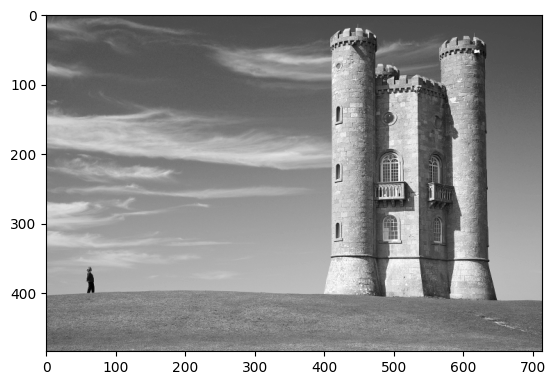

[[0.28627452 0.2901961  0.2901961  ... 0.2627451  0.26666668 0.25490198]
 [0.3019608  0.3019608  0.3019608  ... 0.2627451  0.26666668 0.2627451 ]
 [0.29803923 0.3019608  0.3019608  ... 0.26666668 0.26666668 0.25882354]
 ...
 [0.5176471  0.49019608 0.49411765 ... 0.48235294 0.3882353  0.41960785]
 [0.49019608 0.4392157  0.42745098 ... 0.5294118  0.46666667 0.45882353]
 [0.43137255 0.45882353 0.44705883 ... 0.53333336 0.58431375 0.5019608 ]]
[[0.28627452 0.2901961  0.29803923 ... 0.2627451  0.26666668 0.25490198]
 [0.3019608  0.3019608  0.30588236 ... 0.2627451  0.26666668 0.2627451 ]
 [0.29803923 0.3019608  0.30980393 ... 0.26666668 0.26666668 0.25882354]
 ...
 [0.5176471  0.49411765 0.50980395 ... 0.48235294 0.3882353  0.41960785]
 [0.49019608 0.42745098 0.4392157  ... 0.5294118  0.46666667 0.45882353]
 [0.43137255 0.44705883 0.4627451  ... 0.53333336 0.58431375 0.5019608 ]]


In [83]:
import matplotlib.pyplot as plt
import numpy as np

m = plt.imread('tower.png')
plt.imshow(m, cmap='gray') # affiche l'image
plt.show()

print(m)
print(np.delete(m, 1, 1))

La variable `m` que nous venons de définir contient alors une matrice `numpy` qui représente l'image. Comme l'image est en niveau de gris, chaque pixel est représenté par un nombre flottant (`float`) entre 0 (noir) et 1 (blanc).

In [84]:
print("valeur du pixel en haut à gauche :", m[0][0])
print("nombre de lignes :", len(m))
print("nombre de colonnes :", len(m[0]))
print("dimensions de l'image :", np.shape(m)) # une autre façon possible avec une matrice numpy
print("m est de type", type(m))

valeur du pixel en haut à gauche : 0.28627452
nombre de lignes : 484
nombre de colonnes : 714
dimensions de l'image : (484, 714)
m est de type <class 'numpy.ndarray'>


## Calcul de gradient

On définit une matrice $g = (g_{i, j})$ de même dimension que $m$ telle que :

$$g_{i, j} = |m_{i + 1, j} - m_{i - 1, j}| + |m_{i, j + 1} - m_{i, j - 1}|$$

La formule ci-dessus n'étant pas valable pour la première/dernière ligne ($i = 0$ ou $i = n - 1$, où $n$ est le nombre de lignes de $m$), on utilise à la place :  

$$g_{0, j} = |m_{1, j} - m_{0, j}| + |m_{i, j + 1} - m_{i, j - 1}|$$

$$g_{n - 1, j} = |m_{n - 1, j} - m_{n - 2, j}| + |m_{i, j + 1} - m_{i, j - 1}|$$

Et de même sur la première/dernière colonne.

Intuitivement, $g_{i, j}$ correspond à l'intensité du gradient de l'image sur le pixel $i, j$ : plus il est grand, plus il y a de fortes variation de couleur au niveau de ce pixel.

**Question** : Écrire une fonction `matrice_gradient(m)` qui renvoie `g` à partir de `m`. On pourra utiliser, au choix, une liste de listes ou un tableau `numpy` (en utilisant, par exemple, `np.zeros((..., ...))` pour créer `g`). On pourra utiliser `abs` pour la valeur absolue.

In [85]:
def matrice_gradient(m):
    g = np.zeros(np.shape(m))
    for i in range(len(m)):
        for j in range(len(m[0])):
            if i == 0:
                grad_row = abs(m[i][j] - m[i + 1][j])
            elif i == len(m) - 1:
                grad_row = abs(m[i][j] - m[i - 1][j])
            else:
                grad_row = abs(m[i + 1][j] - m[i - 1][j])
            if j == 0:
                grad_col = abs(m[i][j] - m[i][j + 1])
            elif j == len(m[0]) - 1:
                grad_col = abs(m[i][j] - m[i][j - 1])
            else:
                grad_col = abs(m[i][j + 1] - m[i][j - 1])
            
            g[i][j] = grad_row + grad_col
    return g

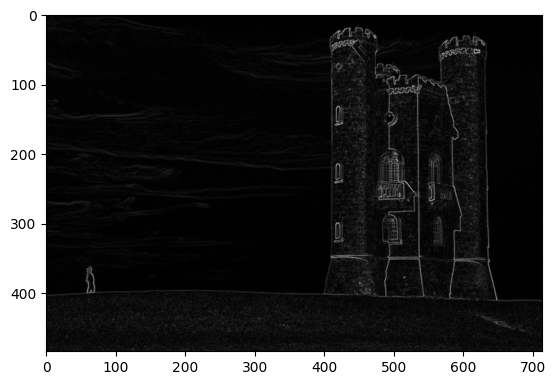

In [86]:
g = matrice_gradient(m)
plt.imshow(g, cmap='gray'); # affichage pour vérifier

Dans la suite, on pourra utiliser la fonction suivante qui sera plus rapide, *a priori* :

In [87]:
def matrice_gradient(m):
    g = np.zeros_like(m)
    g[1:-1] = np.abs(m[2:] - m[:-2])
    g[0] = np.abs(m[1] - m[0])
    g[-1] = np.abs(m[-1] - m[-2])
    g[:, 1:-1] += np.abs(m[:, 2:] - m[:, :-2])
    g[:, 0] += np.abs(m[:, 1] - m[:, 0])
    g[:, -1] += np.abs(m[:, -1] - m[:, -2])
    return g

## Enlever un chemin

Nous enlèverons seulement des chemins verticaux. Un chemin sera donné par une liste `c` contenant les pixels `m[i][c[i]]`. Par exemple, si `c = [231, 230, 231...]` alors `c` passe par le pixel `m[0][231]`, puis `m[1][230]`, `m[2][231]`...

**Question** : Écrire une fonction `enlever_chemin` telle que, si `m` est une image de taille $n\times p$, `enlever_chemin(m, c)` renvoie une matrice `m2` de taille $n\times (p - 1)$ obtenue à partir de `m` en supprimant chaque pixel du chemin `c`. On pourra compléter le code suivant :

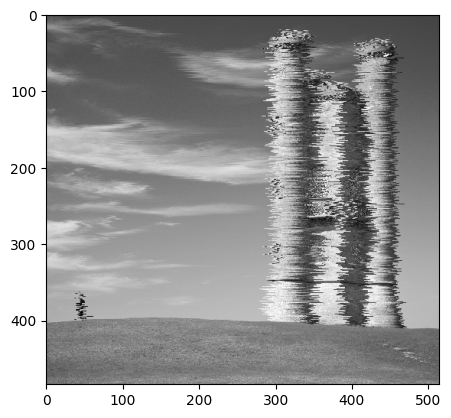

In [88]:
def enlever_chemin(m, c):
    m2 = [] # définition de m2 comme liste de listes
    for i in range(len(m)):
        l = [] # ième ligne de m2
        for j in range(len(m[i])):
            if j != c[i]:
                l.append(m[i][j]) # ajouter la ligne m[i] sauf m[i][c[i]]
        m2.append(l) # ajouter la ligne l à m2
    return np.asarray(m2) 


import random as rd

m_res = m.copy()
for _ in range(200):
    c = [rd.randint(0, len(m_res[0]) - 1) for _ in range(len(m_res))]
    m_res = enlever_chemin(m_res, c)
plt.imshow(m_res, cmap='gray') # affiche l'image
plt.show()

## Calcul d'un chemin d'énergie minimum par programmation dynamique

On ne considère que les chemins verticaux.  
L'**énergie d'un chemin** est définie comme la somme des gradients ($g_{i, j}$) des pixels du chemin.  
Soit $d_{i, j}$ l'énergie minimum d'un chemin depuis le haut de l'image jusqu'à un pixel $i, j$.  
Pour atteindre le pixel $i, j$, on peut soit passer par le pixel $i - 1, j - 1$, soit $i - 1, j$ ou $i - 1, j + 1$.  
On a donc :

$$d_{i, j} = \min(d_{i - 1, j - 1}, d_{i - 1, j}, d_{i - 1, j + 1}) + g_{i, j}$$
$$d_{0, j} = g_{0, j}$$

Remarques : attention à ne pas dépassez les bords de l'image (on ne prend pas en compte le pixel $i - 1, j - 1$ si $j = 0$, par exemple).

**Question** : Écrire une fonction `dp_chemin(g)` qui renvoie une matrice `d` de même dimension que `g` telle que `d[i][j]` est l'énergie minimum d'un chemin depuis le haut de l'image jusqu'à un pixel `i, j`.

In [89]:
def dp_chemin(g):
    n, p = np.shape(g)
    d = np.zeros_like(g)
    d[0, :] = g[0, :]
    for i in range(1, n):
        for j in range(0, p):
            w_min = -1
            for index in [(i - 1, j - 1), (i - 1, j), (i - 1, j + 1)]:
                if 0 <= index[0] < n  and  0 <= index[1] < p:
                    if w_min == -1:
                        w_min = d[index]
                    else:
                        w_min = min(w_min, d[index])
            d[i, j] = w_min + g[i, j]      
    return d

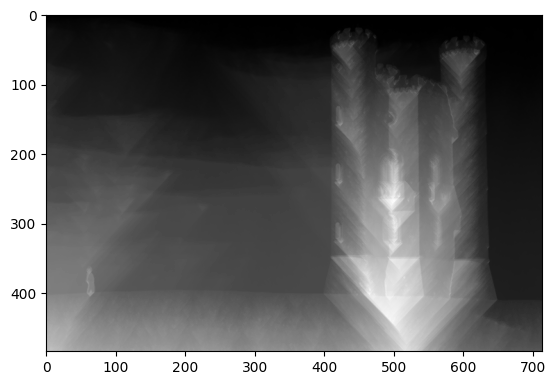

In [90]:
d = dp_chemin(matrice_gradient(m))
plt.imshow(d, cmap='gray'); # affichage de d : plus un pixel est sombre, plus il est facile de le supprimer

On veut maintenant trouver un chemin vertical d'énergie minimum à partir de la matrice `d` de la question précédente.  
Pour cela, on construit le chemin à l'envers : on commence par chercher le pixel de la dernière ligne (tout en bas) d'énergie minimale, puis on remonte.

**Question** : Écrire une fonction `min_energie_bas(d)` qui renvoie le numéro de colonne `j` du pixel de la dernière ligne d'énergie minimale, c'est-à-dire tel que `d[n - 1][j]` est minimal, où `d` est la matrice renvoyée par la fonction `dp_chemin(m)` et `n` est le nombre de lignes de `d`.

In [91]:
def min_energie_bas(d):
    n, p = np.shape(d)
    w_min = d[n - 1][0]
    index_min = 0
    for j in range(1, p):
        if d[n - 1][j] < w_min:
            w_min = d[n - 1][j]
            index_min = j
    return index_min

In [92]:
min_energie_bas(d)

705

**Question** : Écrire une fonction `min_chemin(d)` qui renvoie un chemin `c` vertical d'énergie minimum à partir de la matrice `d`. Ainsi, `c[i]` est le numéro de colonne du pixel de la ligne `i` du chemin. `d` est la matrice renvoyée par la fonction `dp_chemin(m)`. 

In [93]:
def min_chemin(d):
    c = [min_energie_bas(d)]
    for i in reversed(range(len(d) - 1)):
        w_min = d[i][c[-1]], c[-1]
        for j in [c[-1] - 1, c[-1] + 1]:
            if 0 <= j < len(d[0]) and ((d[i][j], j) < w_min):
                    w_min = d[i][j], j
        c.append(w_min[1])
    c.reverse()
    return c

[696, 695, 696, 696, 695, 696, 697, 696, 695, 696]

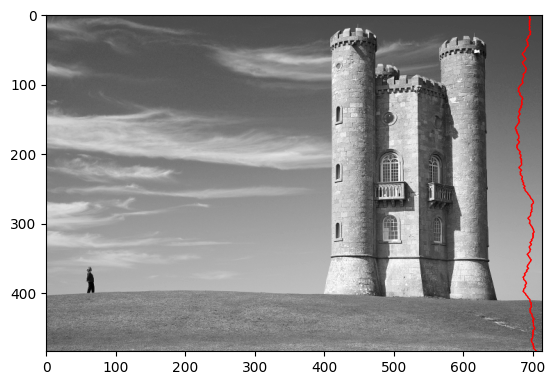

In [94]:
c = min_chemin(dp_chemin(matrice_gradient(m)))
plt.imshow(m, cmap='gray')
plt.plot(c, range(len(c)), 'r', linewidth=1); # affichage de l'image avec le chemin en rouge
c[:10] # affichage des 10 premières valeurs de c

**Question** : Écrire finalement une fonction `seam_carving(m, n)` qui réalise $n$ fois les instructions suivantes :  
- Calculer la matrice `g` des gradients de `m`
- Calculer un chemin `c` d'énergie minimum dans `g`  
- Enlever le chemin `c` de `m`

In [95]:
def seam_carving(m:np.ndarray, n:int):
    m_res = m.copy()
    for i in range(n+1  ):
        print(i)
        c = min_chemin(dp_chemin(matrice_gradient(m_res)))
        m_res = enlever_chemin(m_res, c)
    return m_res

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200


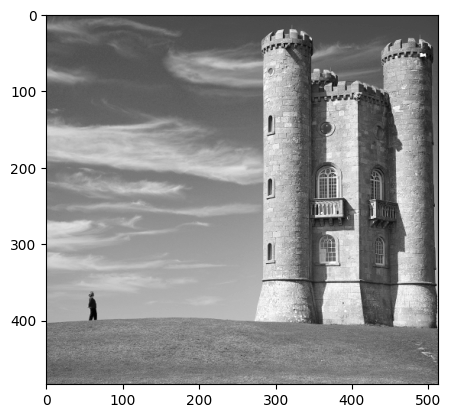

In [96]:
seam_carving_im = seam_carving(m, 200) # on enlève 200 colonnes
plt.imshow(seam_carving_im, cmap='gray');